In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data = pd.read_csv("/content/diabetes[1].csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#it was impossible that	Glucose,	BloodPressure,	SkinThickness,	Insulin,	BMI have zero value, so I decided to reolace it with the mean value

In [6]:
data_copy = data.copy(deep=True)

In [9]:
data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.nan)

In [11]:
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

In [ ]:
#lets check the dataset with heatmap

<Axes: >

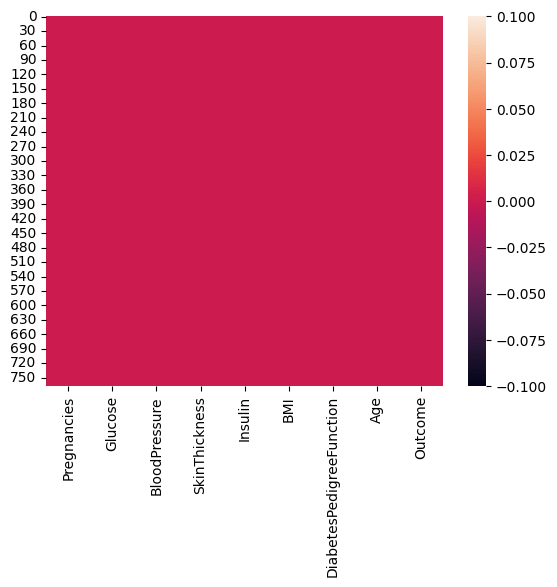

In [13]:
sns.heatmap(data.isnull())

In [ ]:
#as we see that there aren't the missing value anymore

In [14]:
data.duplicated().sum()

0

In [ ]:
#EDA

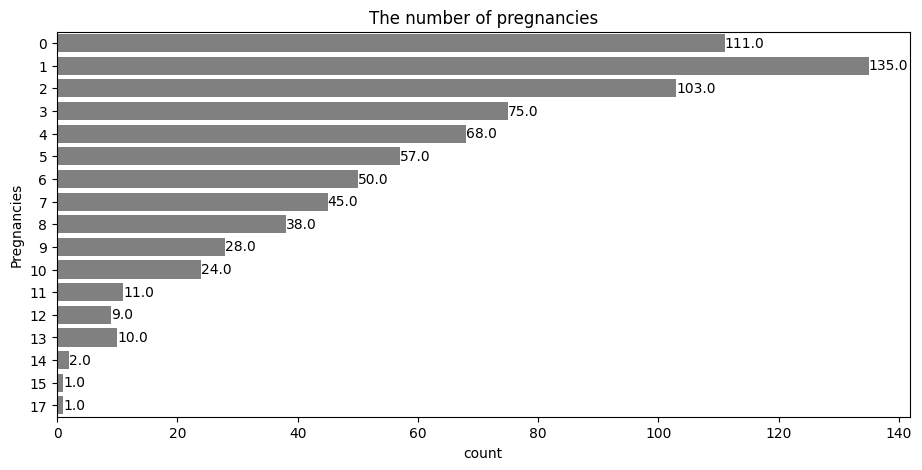

In [15]:
plt.figure(figsize=(11,5))
ax=sns.countplot(y="Pregnancies", data=data, color='gray')
ax.bar_label(ax.containers[0], fmt= '%0.1f', label_type='edge')
plt.title("The number of pregnancies")
plt.show()

In [ ]:
#we see that the most people have once pregnancy

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

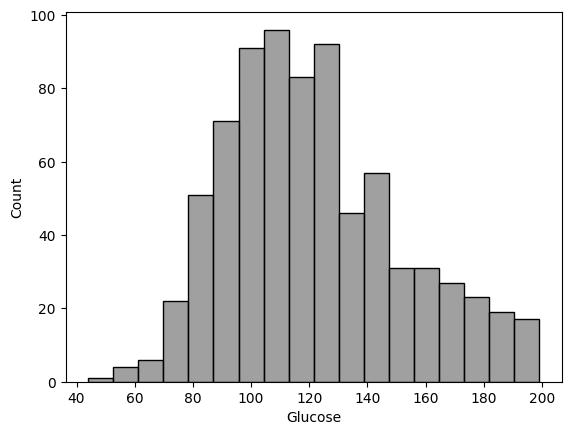

In [18]:
sns.histplot(x="Glucose", data=data, color="gray")
plt.show()

In [ ]:
#from the histogram we could see that people have 110 glucose the most in their blood

<Axes: xlabel='BloodPressure', ylabel='Count'>

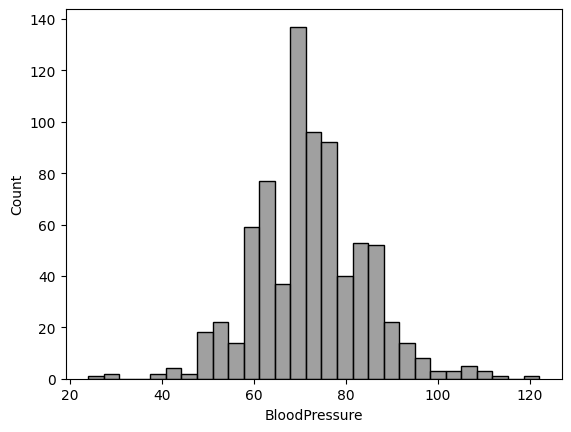

In [17]:
sns.histplot(x="BloodPressure", data=data, color="gray")

<Axes: xlabel='SkinThickness', ylabel='Count'>

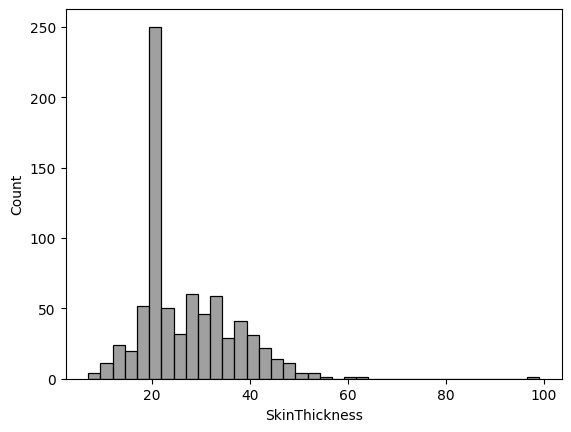

In [19]:
sns.histplot(x="SkinThickness", data=data, color="gray")

<Axes: xlabel='Insulin', ylabel='Count'>

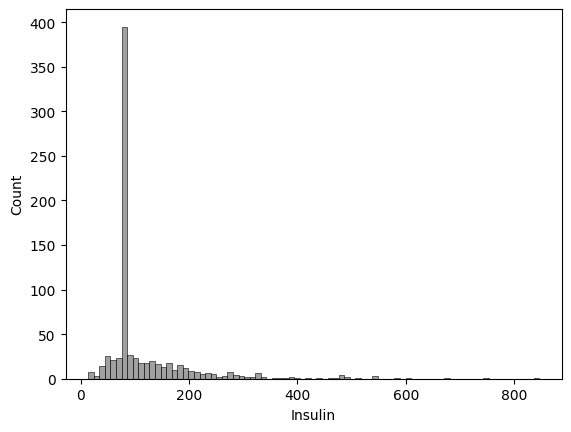

In [20]:
sns.histplot(x="Insulin", data=data, color="gray")

<Axes: xlabel='BMI', ylabel='Count'>

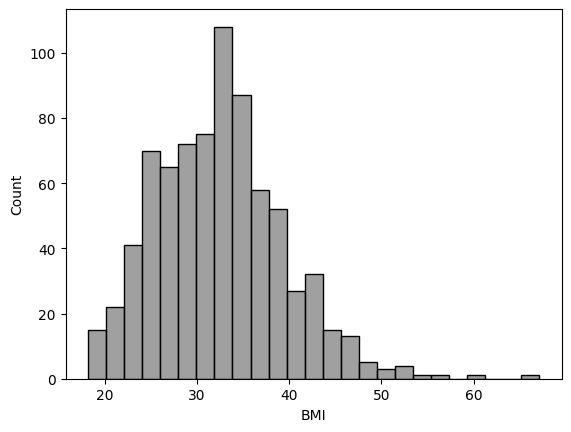

In [21]:
sns.histplot(x="BMI", data=data, color="gray")

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

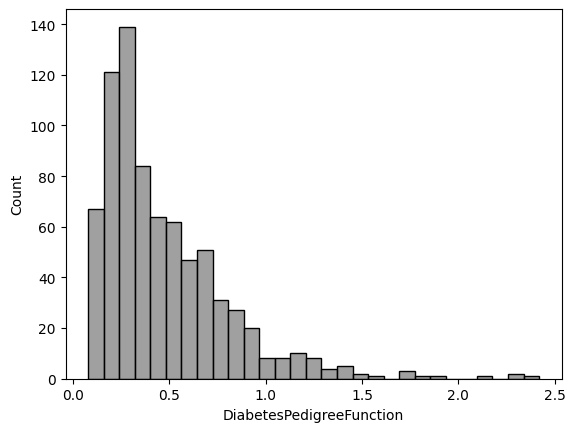

In [22]:
sns.histplot(x="DiabetesPedigreeFunction", data=data, color="gray")

<Axes: xlabel='Age', ylabel='Count'>

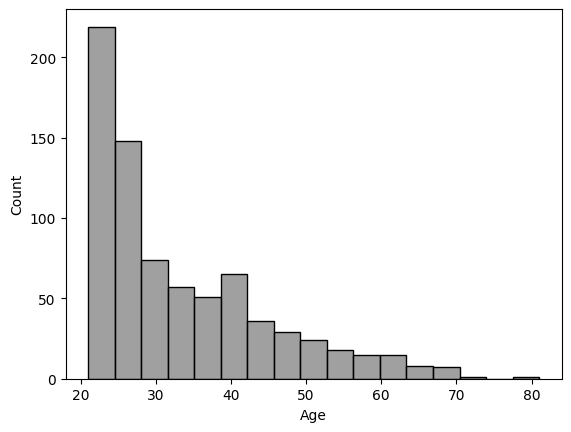

In [23]:
sns.histplot(x="Age", data=data, color="gray")

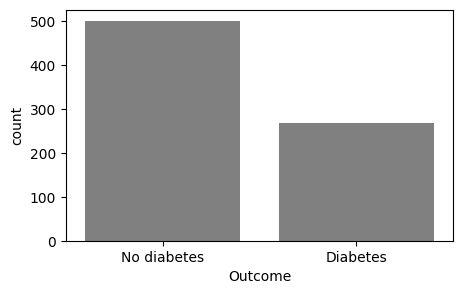

In [24]:
plt.figure(figsize=(5,3))
sns.countplot(x="Outcome", data=data, color="gray")
plt.xticks([0,1],['No diabetes','Diabetes'])
plt.show()

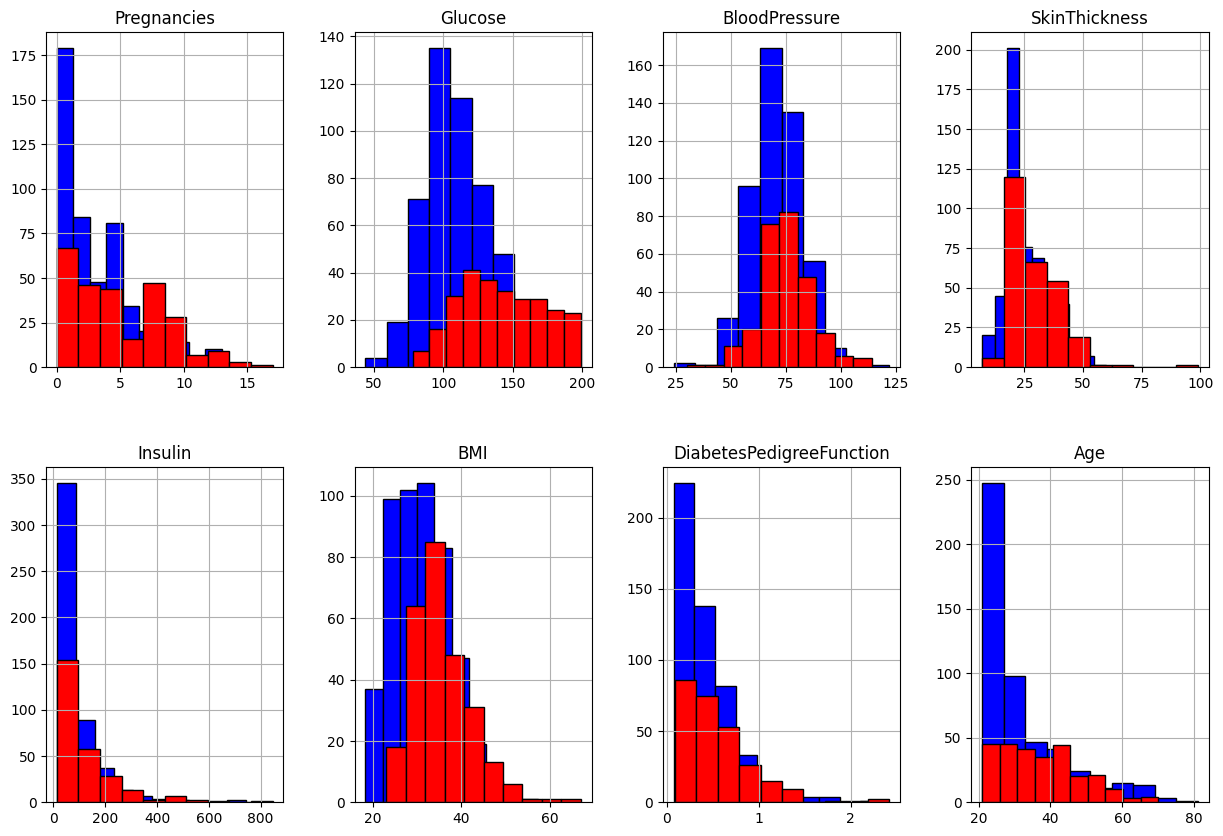

In [25]:
num_fea = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
fig, ax = plt.subplots(2, 4, figsize=(15,10))
data[data.Outcome == 0][num_fea].hist(bins=10, color='blue',alpha=1,ax=ax, edgecolor='black', linewidth=1)
data[data.Outcome == 1][num_fea].hist(bins=10, color='red',alpha=1, ax=ax, edgecolor='black', linewidth=1)
plt.show()

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: >

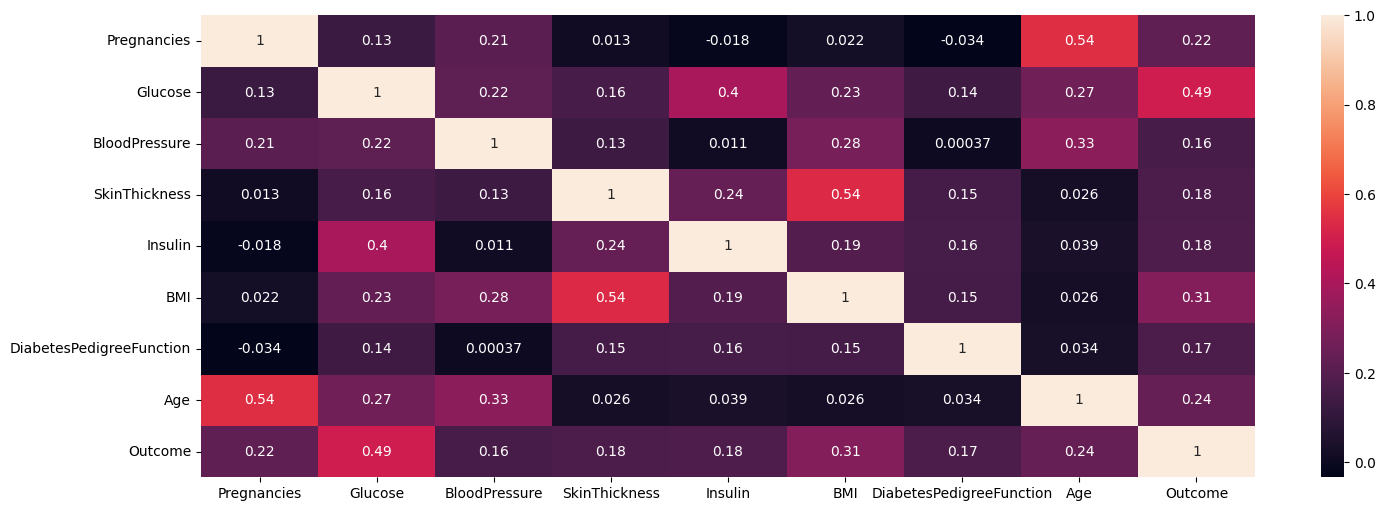

In [26]:
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(),annot=True)

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Splitting dataset

In [27]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#feature scalling

In [29]:
st = StandardScaler()

In [30]:
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [ ]:
#convert numpy array into dataframe

In [31]:
X_train = pd.DataFrame(X_train,columns=data.iloc[:,0:-1].columns)

In [32]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.526397,-1.258063,-0.248752,-0.627692,-0.416027,-0.051306,-0.490735,-1.035940
1,1.588046,-0.327138,0.816509,-0.249548,-0.416027,-0.598577,2.415030,1.487101
2,-0.828460,0.570539,-2.157573,-0.795439,-0.382171,-0.526427,0.549161,-0.948939
3,-1.130523,1.301980,-1.827119,-0.627692,-0.416027,-1.507672,-0.639291,2.792122
4,0.681856,0.404303,0.651283,1.169769,2.653755,1.998836,-0.686829,1.139095
...,...,...,...,...,...,...,...,...
609,0.379793,0.570539,-0.670532,0.951413,0.220783,-0.540857,-0.172824,-0.600933
610,-0.828460,-0.859095,4.121045,-0.627692,-0.416027,-1.435522,-0.778934,-0.513932
611,1.890109,-0.692858,1.146963,1.169769,-0.416027,1.912255,1.981245,0.443084
612,-1.130523,0.637034,-0.248752,-0.627692,-0.416027,1.450493,-0.784877,-0.339929


In [33]:
X_test = pd.DataFrame(X_test,columns=data.iloc[:,0:-1].columns)

In [34]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.681856,-0.792600,-1.166212,0.733056,0.749690,0.238367,-0.116372,0.878091
1,-0.526397,-0.327138,0.238216,0.623878,-0.416027,0.483678,-0.954231,-1.035940
2,-0.526397,-0.460127,-0.670532,-0.627692,-0.416027,-0.223395,-0.924520,-1.035940
3,1.285983,-0.493375,0.651283,-0.627692,-0.416027,-1.118060,1.149329,0.095078
4,0.983919,0.470797,1.477416,-0.627692,-0.416027,-0.353266,-0.770021,1.487101
...,...,...,...,...,...,...,...,...
149,1.588046,1.434969,1.312190,-0.627692,-0.416027,-0.281116,-0.496677,1.400099
150,-0.828460,-1.490794,-1.331439,0.405521,-0.667781,0.137356,2.322925,-0.774936
151,1.285983,-0.892342,-0.009624,-0.627692,-0.416027,0.642409,0.047040,2.096111
152,-0.526397,0.803271,-0.174851,1.278947,2.547973,-0.627437,-0.392688,-0.339929


In [ ]:
#Logistic Regression

In [35]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred1 = log.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred1)

0.7662337662337663

In [ ]:
#SVC

In [38]:
from sklearn import svm

In [39]:
svm = svm.SVC()

In [40]:
svm.fit(X_train,y_train)

SVC()

In [41]:
y_pred2 = svm.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred2)

0.7337662337662337

In [ ]:
#KNeighbors Classifier

In [43]:
knn = KNeighborsClassifier()

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:
y_pred3 = knn.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred3)

0.7662337662337663

In [47]:
score = []
for k in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  score.append(accuracy_score(y_test,y_pred))

In [48]:
score

[0.6363636363636364,
 0.6558441558441559,
 0.7402597402597403,
 0.7337662337662337,
 0.7662337662337663,
 0.7467532467532467,
 0.7597402597402597,
 0.7337662337662337,
 0.7207792207792207,
 0.7467532467532467,
 0.7467532467532467,
 0.7597402597402597,
 0.7532467532467533,
 0.7662337662337663,
 0.7662337662337663,
 0.7662337662337663,
 0.7727272727272727,
 0.7662337662337663,
 0.7662337662337663,
 0.7597402597402597,
 0.7662337662337663,
 0.7727272727272727,
 0.7662337662337663,
 0.7792207792207793,
 0.7727272727272727,
 0.7597402597402597,
 0.7727272727272727,
 0.7792207792207793,
 0.7467532467532467,
 0.7532467532467533,
 0.7467532467532467,
 0.7597402597402597,
 0.7532467532467533,
 0.7467532467532467,
 0.7272727272727273,
 0.7597402597402597,
 0.7597402597402597,
 0.7727272727272727,
 0.7792207792207793]

In [52]:
knn=KNeighborsClassifier(n_neighbors=39)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.7792207792207793

In [ ]:
#non_linear ML algorithm

In [53]:
data = pd.read_csv("/content/diabetes[1].csv")

In [54]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
data_copy = data.copy(deep=True)

In [62]:
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [63]:
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [64]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

In [65]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Decision Tree Classifier

In [67]:
dt = DecisionTreeClassifier()

In [68]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
y_pred4 = dt.predict(X_test)

In [70]:
accuracy_score(y_test,y_pred4)

0.7337662337662337

In [ ]:
#Random forest classifier

In [71]:
rf = RandomForestClassifier()

In [72]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [73]:
y_pred5 = rf.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred5)

0.7922077922077922

In [ ]:
#Gradient Boosting Classifier

In [75]:
gbc = GradientBoostingClassifier()

In [76]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [77]:
y_pred6 = gbc.predict(X_test)

In [78]:
accuracy_score(y_test,y_pred6)

0.7597402597402597

In [79]:
final_data = pd.DataFrame({'Models':["LR","SVM","KNN","DT","RF","GBC"],'ACC':[accuracy_score(y_test,y_pred1),
                                                                       accuracy_score(y_test,y_pred2),
                                                                       accuracy_score(y_test,y_pred3),
                                                                       accuracy_score(y_test,y_pred4),
                                                                       accuracy_score(y_test,y_pred5),
                                                                       accuracy_score(y_test,y_pred6)]})

In [80]:
final_data

,Models,ACC
0,LR,0.766234
1,SVM,0.733766
2,KNN,0.766234
3,DT,0.733766
4,RF,0.792208
5,GBC,0.759740


In [ ]:
#random forest has the higest score of accuracy so I decide to use it as a model to make machine learning

In [81]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [82]:
rf = RandomForestClassifier()

In [84]:
rf.fit(X,y)

RandomForestClassifier()

In [ ]:
#prediction trial

In [85]:
new_data = pd.DataFrame({
    'Pregnancies': 2,
    'Glucose': 90,
    'BloodPressure': 85,
    'SkinThickness': 20,
    'Insulin': 0,
    'BMI': 22,
    'DiabetesPedigreeFunction': 0.200,
    'Age':35,
},index=[0])

In [86]:
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,90,85,20,0,22,0.2,35


In [87]:
pred = rf.predict(new_data)

In [88]:
if pred[0]==0:
  print("No diabetes")
else:
  print("Diabetes")

No diabetes
